In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [2]:
data = tf.keras.utils.image_dataset_from_directory('R:\\Traffic\\Data\\traffic_main//')

Found 113149 files belonging to 2 classes.


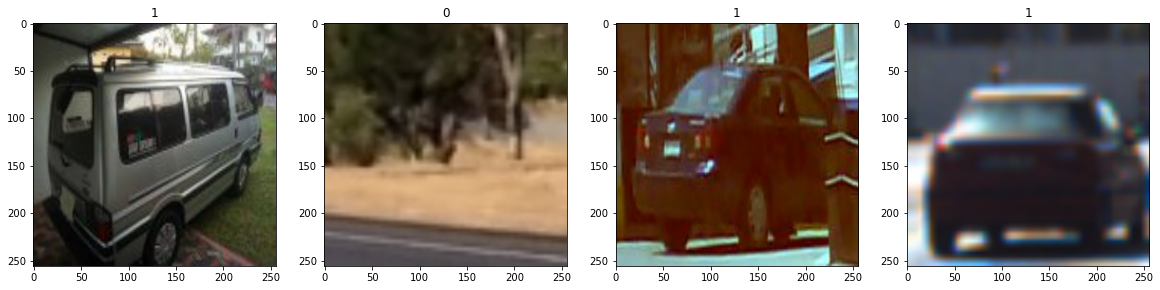

In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.5176471 , 0.5647059 , 0.40784314],
          [0.4867647 , 0.53382355, 0.37696078],
          [0.45171568, 0.4987745 , 0.34289217],
          ...,
          [0.22426471, 0.28284314, 0.16764706],
          [0.3348039 , 0.39142156, 0.28431374],
          [0.42745098, 0.48235294, 0.38039216]],
 
         [[0.5192402 , 0.5670956 , 0.40784314],
          [0.48382735, 0.5316827 , 0.3724303 ],
          [0.44220665, 0.49001226, 0.3316904 ],
          ...,
          [0.23053768, 0.2891161 , 0.17392004],
          [0.35845205, 0.4150697 , 0.30796185],
          [0.46329656, 0.51819855, 0.41623774]],
 
         [[0.5229167 , 0.5726103 , 0.40784314],
          [0.47704887, 0.5267425 , 0.36197534],
          [0.42026272, 0.46979168, 0.30584022],
          ...,
          [0.24501379, 0.3035922 , 0.18839614],
          [0.41302466, 0.4696423 , 0.36253446],
          [0.54601717, 0.6009191 , 0.49895832]],
 
         ...,
 
         [[0.5648897 , 0.38449755, 0.28253677],
          [0.57459

In [5]:
len(data)

3536

In [6]:
train_size = int(len(data)*.75)//2
val_size = int(len(data)*.15)//2
test_size = int(len(data)*.1)//2

In [7]:
print(train_size, val_size, test_size)

1326 265 176


In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [9]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [12]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3
1326/1326 [==============================] - 955s 716ms/step - loss: 0.0982 - accuracy: 0.9668 - val_loss: 0.0952 - val_accuracy: 0.9630
Epoch 2/3
1326/1326 [==============================] - 718s 539ms/step - loss: 0.0494 - accuracy: 0.9809 - val_loss: 0.0424 - val_accuracy: 0.9838
Epoch 3/3
1326/1326 [==============================] - 344s 259ms/step - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.0305 - val_accuracy: 0.9882


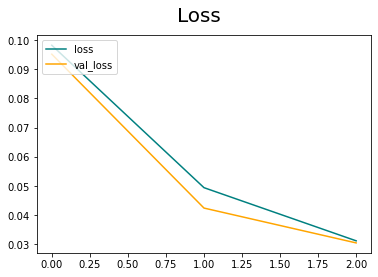

In [14]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

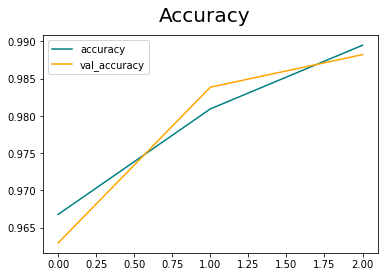

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [16]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [17]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.99209714 0.9955512 0.9886364


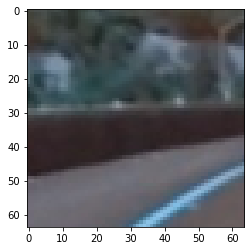

In [77]:
img = cv2.imread('R:\\Traffic\\Traffic\\test\\notraf3.png')
plt.imshow(img)
plt.show()

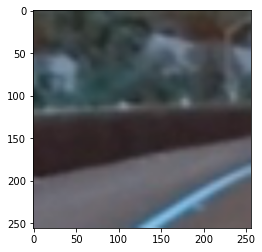

In [78]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [79]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [80]:
yhat

array([[0.4442745]], dtype=float32)

In [81]:
if yhat > 0.9: 
    print('Vehicle')
else:
    print('No Vehicle')

No Traffic


In [28]:
model.save(os.path.join('models','traffic_main.h5'))